In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Open University Learning Analytics dataset

## Dataset Descriptions

### courses.csv

- Contains the list of all available modules and their presentations.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Code name of the module, serving as the identifier.      |
| code_presentation     | Code name of the presentation (year + B or J).           |
| length                | Length of the module-presentation in days.               |

### assessments.csv

- Contains information about assessments in module-presentations.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code of the module.                      |
| code_presentation     | Identification code of the presentation.                |
| id_assessment         | Identification number of the assessment.                |
| assessment_type       | Type of assessment (TMA, CMA, Exam).                     |
| date                  | Final submission date of the assessment.                |
| weight                | Weight of the assessment in percentage.                 |

### vle.csv

- Contains information about available materials in the VLE.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| id_site               | Identification number of the material.                   |
| code_module           | Identification code for the module.                      |
| code_presentation     | Identification code of the presentation.                |
| activity_type         | The role associated with the module material.            |
| week_from             | Week from which the material is planned to be used.     |
| week_to               | Week until which the material is planned to be used.    |

### studentInfo.csv

- Contains demographic information about the students together with their results.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code for the module.                      |
| code_presentation     | Identification code of the presentation.                |
| id_student            | Unique identification number for the student.           |
| gender                | Student's gender.                                       |
| region                | Geographic region where the student lived.              |
| highest_education     | Highest education level on entry.                       |
| imd_band              | Index of Multiple Deprivation band.                     |
| age_band              | Band of the student's age.                              |
| num_of_prev_attempts  | Number of times the student has attempted the module.    |
| studied_credits       | Total number of credits for the modules the student is studying. |
| disability            | Indicates whether the student has declared a disability. |
| final_result          | Student's final result in the module-presentation.       |

### studentRegistration.csv

- Contains information about the time when the student registered for the module presentation.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code for a module.                        |
| code_presentation     | Identification code of the presentation.                |
| id_student            | Unique identification number for the student.           |
| date_registration     | Date of student's registration relative to the start of the module-presentation. |
| date_unregistration   | Date of student's unregistration relative to the start of the module-presentation. (Empty for completed courses) |

### studentAssessment.csv

- Contains the results of students' assessments.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| id_assessment         | Identification number of the assessment.                |
| id_student            | Unique identification number for the student.           |
| date_submitted        | Date of student submission, measured as the number of days since the start of the module presentation. |
| is_banked             | A status flag indicating that the assessment result has been transferred from a previous presentation. |
| score                 | The student's score in this assessment.                  |

### studentVle.csv

- Contains information about each student's interactions with the materials in the VLE.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code for a module.                        |
| code_presentation     | Identification code of the module presentation.          |
| id_student            | Unique identification number for the student.           |
| id_site               | Identification number for the VLE material.             |
| date                  | Date of student's interaction with the material, measured as the number of days since the start of the module-presentation. |
| sum_click             | The number of times a student interacts with the material in that day. |


 It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

In [9]:
# Will only need studentAssesment and studentInfo
oulad_studInf_df = pd.read_csv('studentInfo.csv')
oulad_studAssess_df = pd.read_csv('studentAssessment.csv')

In [10]:
oulad_studAssess_df

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [11]:
oulad_studInf_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


# Basic EDA on Data

In [17]:
oulad_studInf_df.describe().loc[:, ['num_of_prev_attempts', 'studied_credits']]

,num_of_prev_attempts,studied_credits
count,32593.000000,32593.000000
mean,0.163225,79.758691
std,0.479758,41.071900
min,0.000000,30.000000
25%,0.000000,60.000000
50%,0.000000,60.000000
75%,0.000000,120.000000
max,6.000000,655.000000


In [18]:
oulad_studAssess_df.describe().loc[:, ['date_submitted', 'is_banked', 'score']]

,date_submitted,is_banked,score
count,173912.000000,173912.000000,173739.000000
mean,116.032942,0.010977,75.799573
std,71.484148,0.104194,18.798107
min,-11.000000,0.000000,0.000000
25%,51.000000,0.000000,65.000000
50%,116.000000,0.000000,80.000000
75%,173.000000,0.000000,90.000000
max,608.000000,1.000000,100.000000


## Gender performance in terms of passing modules

<Axes: xlabel='final_result', ylabel='count'>

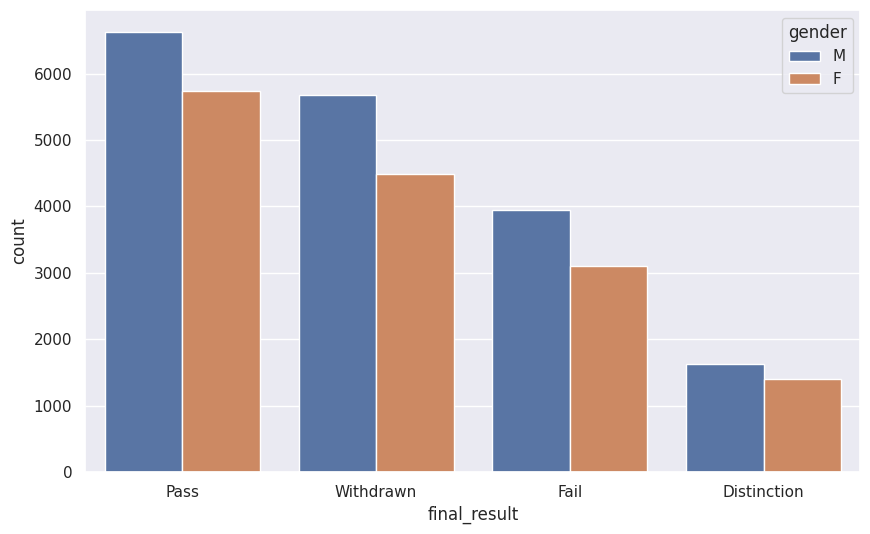

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='final_result', hue='gender', data=oulad_studInf_df.loc[:,['gender', 'final_result']])

<Axes: xlabel='code_module', ylabel='count'>

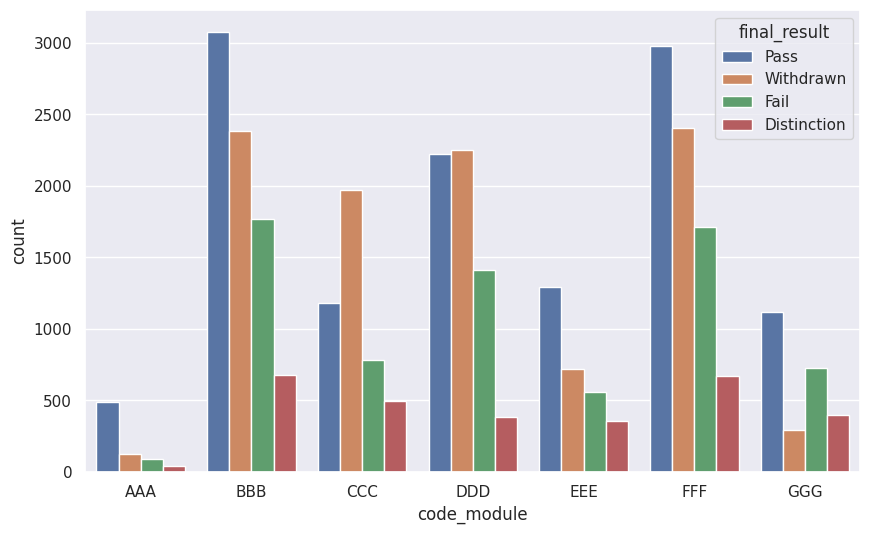

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', hue='final_result', data=oulad_studInf_df.loc[:,['code_module', 'final_result']])

In [46]:
def plot_normalized_counts(df, x_col, hue_col, count_col):
    """
    Create a bar plot with normalized counts for a given DataFrame and columns.

    Args:
        df (DataFrame): The DataFrame to use.
        x_col (str): The name of the column to use for the x-axis.
        hue_col (str): The name of the column to use for splitting the bars by hue.
        count_col (str): The name of the column to use for calculating the counts.

    Returns:
        None
    """
    plt.figure(figsize=(15, 6))
    # Calculate the normalized counts
    counts = (df.groupby([x_col, hue_col])[count_col]
              .count()
              .unstack()
              .fillna(0))
    counts = counts.div(counts.sum(axis=1), axis=0)

    # Melt the counts dataframe to long format
    counts = counts.reset_index().melt(id_vars=x_col)

    # Create a barplot with normalized counts
    sns.barplot(x=x_col, y='value', hue=hue_col, data=counts)

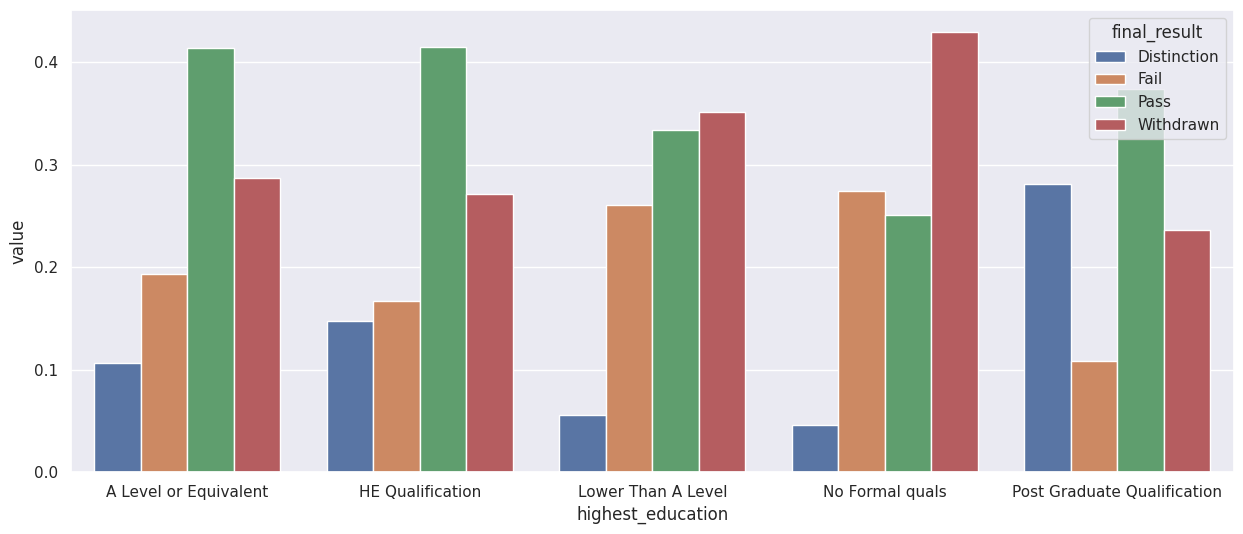

In [47]:
plot_normalized_counts(oulad_studInf_df, 'highest_education', 'final_result', 'final_result')

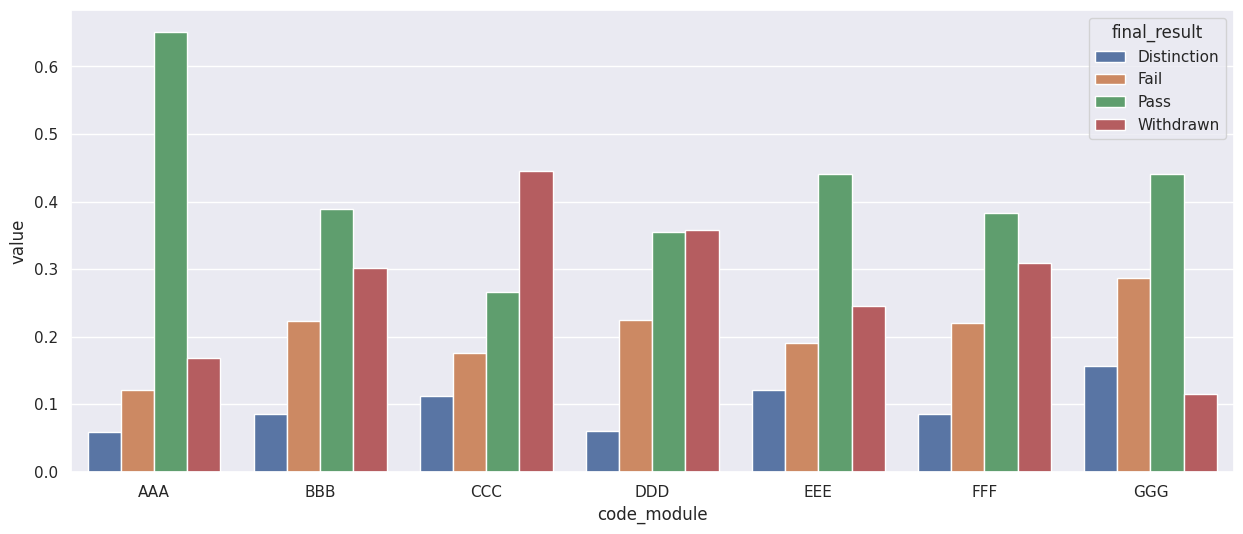

In [48]:
plot_normalized_counts(oulad_studInf_df, 'code_module', 'final_result', 'final_result')

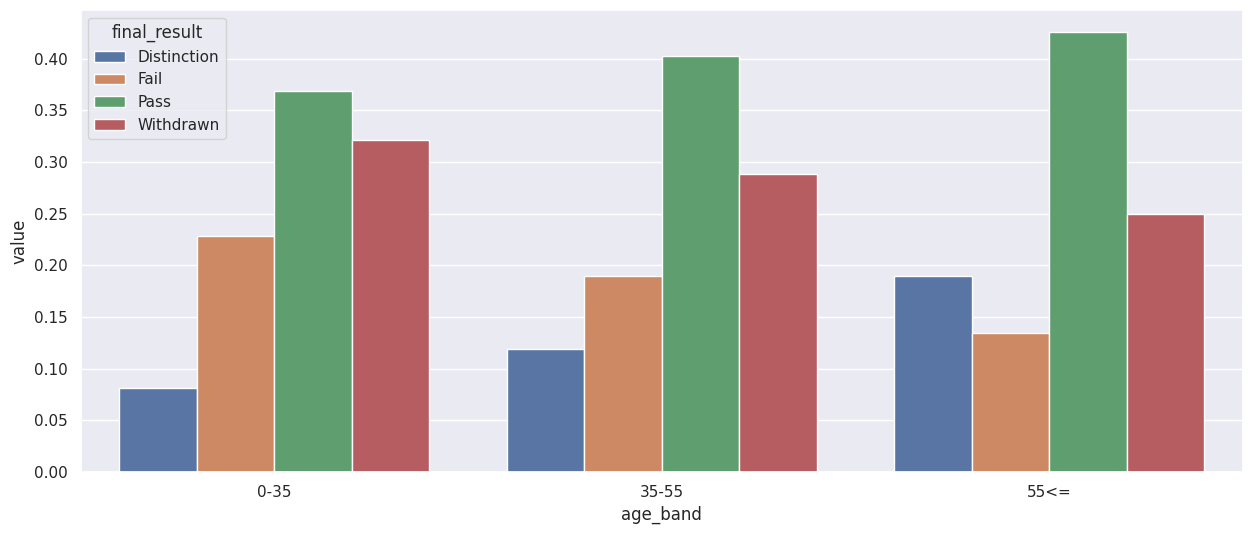

In [49]:
plot_normalized_counts(oulad_studInf_df, 'age_band', 'final_result', 'final_result')